In [162]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
from scipy.stats import expon

## Target Variables: Demand of various industries

In [2]:
df = pd.read_csv("Dataset/Raw Data/job-vacancy-by-industry-level3.csv")
df.head()

,year,industry1,industry2,industry3,job_vacancy
0,1990,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",500
1,1990,manufacturing,textile and wearing apparel,textile and wearing apparel,4700
2,1990,manufacturing,paper products and publishing,paper products and publishing,1000
3,1990,manufacturing,petroleum and chemical products,petroleum and chemical products,600
4,1990,manufacturing,rubber and plastic products,rubber and plastic products,1100


In [3]:
print(f"Number of industries (level 1): {len(df['industry1'].unique())}")
print(f"Number of industries (level 2): {len(df['industry2'].unique())}")
print(f"Number of industries (level 3): {len(df['industry3'].unique())}")

Number of industries (level 1): 4
Number of industries (level 2): 35
Number of industries (level 3): 56


In [4]:
df['industry3'].unique()

array(['food, beverages and tobacco', 'textile and wearing apparel',
       'paper products and publishing', 'petroleum and chemical products',
       'rubber and plastic products', 'fabricated metal products',
       'machinery and equipment', 'electrical products',
       'electronic products', 'medical and precision instruments',
       'transport equipment', 'other manufacturing industries',
       'construction', 'wholesale trade', 'retail trade', 'hotels',
       'restaurants', 'transport, storage and communications',
       'financial institutions', 'insurance and pension funding',
       'business and real estate services',
       'community, social and personal services', 'others',
       'paper products and printing',
       'petroleum, chemical and pharmaceutical products',
       'land transport and supporting services',
       'water transport and supporting services',
       'air transport and supporting services',
       'other transport and storage services',
       'br

In [5]:
df_out = pd.DataFrame(columns=np.insert(df['industry3'].unique(), 0, "year"))
df_out['year'] = df['year'].unique()
df_out

,year,"food, beverages and tobacco",textile and wearing apparel,paper products and publishing,petroleum and chemical products,rubber and plastic products,fabricated metal products,machinery and equipment,electrical products,electronic products,...,"telecommunications, broadcasting and publishing",financial services,insurance services,real estate services,security and investigation,cleaning and landscaping,other adminstrative and support services,public administration and education,health and social services,"arts, entertainment and recreation"
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for index, row in df.iterrows():
    rowIndex = df_out.index[df_out['year'] == row['year']]
    df_out.loc[rowIndex, row['industry3']] = row['job_vacancy']
    
df_out.tail()

,year,"food, beverages and tobacco",textile and wearing apparel,paper products and publishing,petroleum and chemical products,rubber and plastic products,fabricated metal products,machinery and equipment,electrical products,electronic products,...,"telecommunications, broadcasting and publishing",financial services,insurance services,real estate services,security and investigation,cleaning and landscaping,other adminstrative and support services,public administration and education,health and social services,"arts, entertainment and recreation"
26,2016,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,900,2800,500,1500,2300,1400,1200,5400,3100,1400
27,2017,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,800,3700,500,1100,2000,1500,1200,4900,2700,1500
28,2018,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,800,4300,700,1200,1900,1800,1400,5200,3300,1100
29,2019,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,700,4600,700,1300,1500,1200,1300,5400,3700,1100
30,2020,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,600,3800,500,1100,1400,1300,1300,6300,4000,600


In [7]:
drop_columns = []
for column in df_out:
    if np.isnan(float(df_out[column][30])):
        drop_columns.append(column)
        
print(drop_columns)

['textile and wearing apparel', 'paper products and publishing', 'petroleum and chemical products', 'rubber and plastic products', 'fabricated metal products', 'machinery and equipment', 'electrical products', 'electronic products', 'medical and precision instruments', 'hotels', 'restaurants', 'transport, storage and communications', 'financial institutions', 'insurance and pension funding', 'business and real estate services', 'community, social and personal services', 'paper products and printing', 'broadcasting and publishing', 'telecommunications', 'insurance', 'real estate and leasing services', 'administrative and support services', 'education', 'health, social and community services']


In [8]:
df_out.drop(columns=drop_columns, inplace=True)
df_out = df_out.replace('-', 0)

In [9]:
df_out.to_csv('Dataset/industry_demand.csv')

## Quarterly Dataset

In [10]:
df = pd.read_csv('Dataset/Raw Data/industry_demand_q.csv')
df.head()

,Data Series,2022 3Q,2022 2Q,2022 1Q,2021 4Q,2021 3Q,2021 2Q,2021 1Q,2020 4Q,2020 3Q,...,1992 2Q,1992 1Q,1991 4Q,1991 3Q,1991 2Q,1991 1Q,1990 4Q,1990 3Q,1990 2Q,1990 1Q
0,Total,110500,127000,123100,114000,104200,93800,67000,53000,53300,...,41700,38700,31400,40900,39700,40400,36100,47300,46100,45100
1,Goods Producing Industries,23900,28200,27700,26900,26200,27600,15900,11000,9300,...,na,na,na,na,na,na,na,na,na,na
2,Manufacturing,13700,15900,14500,13800,13400,15200,8900,5900,5400,...,na,na,na,na,na,na,na,na,na,na
3,"Food, Beverages & Tobacco",1500,1800,1800,1700,1500,1400,800,1000,1000,...,na,na,na,na,na,na,na,na,na,na
4,Paper/Rubber/Plastic Products & Printing,700,800,1200,1100,900,1400,700,400,400,...,na,na,na,na,na,na,na,na,na,na


In [11]:
df = df.transpose()
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'Time'})
df = df.iloc[::-1]
df.reset_index(inplace=True, drop=True)
df = df.drop(list(range(65)))
df

Data Series,Time,Total,Goods Producing Industries,Manufacturing,"Food, Beverages & Tobacco",Paper/Rubber/Plastic Products & Printing,"Petroleum, Chemical & Pharmaceutical Products","Fabricated Metal Products, Machinery & Equipment","Electronic, Computer & Optical Products",Transport Equipment,...,Other Administrative & Support Services,"Community, Social And Personal Services",Public Administration & Education,Health & Social Services,"Arts, Entertainment & Recreation","Other Community, Social & Personal Services",Others,"Professionals, Managers, Executives & Technicians","Clerical, Sales & Service Workers","Production & Transport Operators, Cleaners & Labourers"
65,2006 2Q,33000,12000,9300,300,500,400,2400,3000,2000,...,600,6000,4100,1200,500,300,500,14700,8300,10000
66,2006 3Q,32200,10300,8600,300,500,300,2200,2800,1800,...,500,6600,4300,1200,600,400,300,13700,8300,10200
67,2006 4Q,33300,10100,8000,400,500,300,2800,2100,1500,...,500,6400,3900,1300,600,600,200,15100,8700,9600
68,2007 1Q,35700,11000,9000,300,600,400,2700,2400,1900,...,500,7200,4400,1500,600,600,200,16000,9200,10600
69,2007 2Q,39200,11400,8400,400,500,500,2000,2000,2200,...,300,8400,5500,1600,700,600,600,18500,10200,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2021 3Q,104200,26200,13400,1500,900,800,3500,3100,1800,...,3100,19200,9500,6600,1900,1300,900,55200,19400,29500
127,2021 4Q,114000,26900,13800,1700,1100,1100,3100,3000,2000,...,3300,19000,9500,6500,2000,1000,700,63200,20800,30000
128,2022 1Q,123100,27700,14500,1800,1200,1100,3800,3100,2000,...,3100,22000,10200,7700,1900,2200,900,69700,23200,30100
129,2022 2Q,127000,28200,15900,1800,800,1200,4700,3600,2400,...,4200,23400,10900,8100,2000,2500,600,70600,26200,30100


In [12]:
df = df.drop(columns=['Professionals, Managers, Executives & Technicians', 'Clerical, Sales & Service Workers', 
                'Production & Transport Operators, Cleaners & Labourers'])
df.iloc[0, :]

Data Series
Time                                                      2006 2Q 
Total                                                        33000
  Goods Producing Industries                                 12000
    Manufacturing                                             9300
      Food, Beverages & Tobacco                                300
      Paper/Rubber/Plastic Products & Printing                 500
      Petroleum, Chemical & Pharmaceutical Products            400
      Fabricated Metal Products, Machinery & Equipment        2400
      Electronic, Computer & Optical Products                 3000
      Transport Equipment                                     2000
      Other Manufacturing Industries                           700
    Construction                                              2200
  Services                                                   21100
    Wholesale And Retail Trade                                3000
      Wholesale Trade                             

In [13]:
df['Time'] = pd.to_datetime(df['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
df = df.set_index('Time')
df.index.name = 'Time'

<ipython-input-13-74adad742639>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = pd.to_datetime(df['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


In [14]:
df

Data Series,Total,Goods Producing Industries,Manufacturing,"Food, Beverages & Tobacco",Paper/Rubber/Plastic Products & Printing,"Petroleum, Chemical & Pharmaceutical Products","Fabricated Metal Products, Machinery & Equipment","Electronic, Computer & Optical Products",Transport Equipment,Other Manufacturing Industries,...,Administrative And Support Services,Security & Investigation,Cleaning & Landscaping,Other Administrative & Support Services,"Community, Social And Personal Services",Public Administration & Education,Health & Social Services,"Arts, Entertainment & Recreation","Other Community, Social & Personal Services",Others
Time,,,,,,,,,,,,,,,,,,,,,
2006-04-01,33000,12000,9300,300,500,400,2400,3000,2000,700,...,1800,800,400,600,6000,4100,1200,500,300,500
2006-07-01,32200,10300,8600,300,500,300,2200,2800,1800,600,...,2200,1100,600,500,6600,4300,1200,600,400,300
2006-10-01,33300,10100,8000,400,500,300,2800,2100,1500,400,...,2100,1100,400,500,6400,3900,1300,600,600,200
2007-01-01,35700,11000,9000,300,600,400,2700,2400,1900,700,...,2100,1200,500,500,7200,4400,1500,600,600,200
2007-04-01,39200,11400,8400,400,500,500,2000,2000,2200,800,...,2100,1500,200,300,8400,5500,1600,700,600,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,104200,26200,13400,1500,900,800,3500,3100,1800,1800,...,7600,1700,2800,3100,19200,9500,6600,1900,1300,900
2021-10-01,114000,26900,13800,1700,1100,1100,3100,3000,2000,1800,...,7200,1800,2100,3300,19000,9500,6500,2000,1000,700
2022-01-01,123100,27700,14500,1800,1200,1100,3800,3100,2000,1500,...,7500,2100,2300,3100,22000,10200,7700,1900,2200,900


In [15]:
df.to_csv('Dataset/industry_demand_all_q.csv')

In [16]:
df.columns = df.columns.str.strip()
parent_columns = ['Total', 'Goods Producing Industries', 'Manufacturing', 'Services', 'Wholesale And Retail Trade', 
                  'Transportation And Storage', 'Accommodation And Food Services', 'Information And Communications', 
                  'Financial And Insurance Services', 'Professional Services', 'Administrative And Support Services', 
                  'Community, Social And Personal Services']

df = df.drop(columns=parent_columns)
df.iloc[0, :]

Data Series
Food, Beverages & Tobacco                            300
Paper/Rubber/Plastic Products & Printing             500
Petroleum, Chemical & Pharmaceutical Products        400
Fabricated Metal Products, Machinery & Equipment    2400
Electronic, Computer & Optical Products             3000
Transport Equipment                                 2000
Other Manufacturing Industries                       700
Construction                                        2200
Wholesale Trade                                     1600
Retail Trade                                        1300
Land Transport & Supporting Services                 200
Water Transport & Supporting Services                900
Air Transport & Supporting Services                 1100
Other Transportation & Storage Services              700
Accommodation                                        900
Food & Beverage Services                            1300
Telecommunications, Broadcasting & Publishing        400
IT & Other Informat

In [17]:
df.to_csv('Dataset/industry_demand_child_q.csv')

## Predictor Variables - Monthly Data

In [18]:
cessation = pd.read_csv('Dataset/Raw Data/SingStat/Cessation of Business Entities by Industry.csv', parse_dates=['Time'], index_col='Time')
cessation = cessation.resample('QS').sum()
cessation.head()

,Cessation Manufacturing,Cessation Construction,Cessation Wholesale Trade,Cessation Retail Trade,Cessation Transportation & Storage,Cessation Accommodation,Cessation Food & Beverage Services,Cessation Information & Communications,Cessation Finance & Insurance,Cessation Real Estate,Cessation Professional Services,Cessation Administrative & Support Services,"Cessation Education, Health & Social Services","Cessation Arts, Entertainment, Recreation & Other Services",Cessation Others
Time,,,,,,,,,,,,,,,
1990-01-01,411,438,1062,642,168,4,160,55,71,84,197,206,69,246,29
1990-04-01,441,436,1125,688,204,2,209,40,54,109,215,177,53,273,33
1990-07-01,388,364,1025,672,163,5,170,57,76,103,174,149,68,253,28
1990-10-01,385,388,1037,798,180,4,164,49,78,93,178,165,52,212,48
1991-01-01,349,298,874,625,167,3,143,51,74,76,162,134,56,175,44


In [19]:
changi = pd.read_csv('Dataset/Raw Data/SingStat/Changi Airport Statistics.csv', parse_dates=['Time'], index_col='Time')
changi = changi.resample('QS').sum()
changi.head()

,Aircraft Arrivals And Departures,Total Passengers,Total Mail
Time,,,
1980-01-01,19004,1716786,1854
1980-04-01,18642,1743081,1921
1980-07-01,19077,1888363,1961
1980-10-01,19248,1946319,2316
1981-01-01,18336,1896053,2074


In [20]:
contracts = pd.read_csv('Dataset/Raw Data/SingStat/Contracts Awarded by Sector and Type.csv', parse_dates=['Time'], index_col='Time')
contracts = contracts.resample('QS').sum()
contracts.head()

,Contracts Residential,Contracts Commercial,Contracts Industrial,Contracts Institutional & Others,Contracts Civil Engineering
Time,,,,,
1986-01-01,334.9,38.1,39.9,117.7,866.8
1986-04-01,336.7,11.6,23.6,176.7,410.5
1986-07-01,462.1,28.3,42.7,113.8,182.8
1986-10-01,358.8,26.9,29.3,132.2,164.4
1987-01-01,452.1,57.1,41.9,110.7,306.1


In [21]:
formation = pd.read_csv('Dataset/Raw Data/SingStat/Formation of Business Entities by Industry.csv', parse_dates=['Time'], index_col='Time')
formation = formation.resample('QS').sum()
formation.head()

,Formation Manufacturing,Formation Construction,Formation Wholesale Trade,Formation Retail Trade,Formation Transportation & Storage,Formation Accommodation,Formation Food & Beverage Services,Formation Information & Communications,Formation Finance & Insurance,Formation Real Estate,Formation Professional Services,Formation Administrative & Support Services,"Formation Education, Health & Social Services","Formation Arts, Entertainment, Recreation & Other Services",Formation Others
Time,,,,,,,,,,,,,,,
1990-01-01,628,602,1752,793,357,7,209,134,190,211,433,323,111,328,13
1990-04-01,603,640,1841,902,334,6,229,123,231,226,426,247,122,352,17
1990-07-01,580,631,1815,876,353,3,184,158,207,201,432,311,95,326,18
1990-10-01,539,544,1604,778,301,5,204,127,183,185,399,248,97,286,21
1991-01-01,544,746,1655,644,346,1,191,149,126,209,471,259,100,317,22


In [22]:
shipping = pd.read_csv('Dataset/Raw Data/SingStat/Shipping Statistics.csv', parse_dates=['Time'], index_col='Time')
shipping = shipping.resample('QS').sum()
shipping.head()

,Vessel Arrivals Shipping Tonnage,Total Cargo,Singapore Registry Of Ships
Time,,,
1995-01-01,171207,73219.9,8058
1995-04-01,176408,76219.3,8218
1995-07-01,179771,78356.1,8437
1995-10-01,183188,77688.7,8654
1996-01-01,191568,75994.1,8945


In [23]:
monthlyData = [cessation, changi, contracts, formation, shipping]

## Quarterly Data

In [24]:
bop = pd.read_csv('Dataset/Raw Data/SingStat/Balance of Payments.csv', parse_dates=['Time'])
bop['Time'] = pd.to_datetime(bop['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
bop.set_index('Time')
bop.head()

<ipython-input-24-2ff7256900ed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  bop['Time'] = pd.to_datetime(bop['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Exports Goods,Imports Goods,Exports Services Manufacturing,Exports Services Maintenance And Repair,Exports Services Transport,Exports Services Travel,Exports Services Insurance,Exports Services Government Goods And Services,Exports Services Construction,...,Imports Services Transport,Imports Services Travel,Imports Services Insurance,Imports Services Government Goods And Services,Imports Services Construction,Imports Services Financial,"Imports Services Telecommunications, Computer & Information",Imports Services Charges For The Use Of Intellectual Property,"Imports Services Personal, Cultural And Recreational",Imports Services Other Business Services
0,2022-10-01,184495.6,142788.6,70.4,3288.1,32061.5,5749.0,2413.0,111.8,309.1,...,30989.6,6897.8,2041.9,80.5,204.6,3869.0,9622.0,5379.4,354.8,27729.9
1,2022-07-01,212381.4,162626.6,88.0,2618.2,36038.0,4798.3,2507.4,111.6,284.3,...,31825.1,6176.9,2005.3,76.1,203.0,3846.9,9388.0,5461.6,346.7,27824.4
2,2022-04-01,213445.5,160826.4,77.4,2462.3,36509.1,3518.1,2809.7,110.4,290.8,...,32374.9,5614.4,2162.0,60.4,187.5,3914.5,9049.1,5521.3,333.0,27570.1
3,2022-01-01,188684.3,144528.4,76.9,2323.7,35397.3,2193.9,2479.7,109.1,269.3,...,31824.6,2387.8,2005.7,107.8,219.2,3877.3,8964.7,5430.0,331.1,28356.6
4,2021-10-01,191091.7,144404.1,83.4,2511.0,32424.2,1619.7,2204.6,106.2,287.0,...,30992.9,1711.8,1976.1,84.9,187.2,3946.1,9203.1,5683.9,332.4,28039.8


In [25]:
expManu = pd.read_csv('Dataset/Raw Data/SingStat/Business Expectations Manufacturing.csv', parse_dates=['Time'])
expManu['Time'] = pd.to_datetime(expManu['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
expManu.set_index('Time')
expManu.head()

<ipython-input-25-bf0bd9b376cd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  expManu['Time'] = pd.to_datetime(expManu['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Numbers Employed Forecast Semiconductors,Numbers Employed Forecast Infocomms & Consumer Electronics,Numbers Employed Forecast Other Electronic Modules & Components,Numbers Employed Forecast Petroleum,Numbers Employed Forecast Petrochemicals,Numbers Employed Forecast Specialty Chemicals,Numbers Employed Forecast Chemicals Others,Numbers Employed Forecast Pharmaceuticals,Numbers Employed Forecast Medical Technology,...,Output Forecast Pharmaceuticals,Output Forecast Medical Technology,Output Forecast Machinery & Systems,Output Forecast Precision Modules & Components,Output Forecast Marine & Offshore Engineering,Output Forecast Aerospace,Output Forecast Transport Land,"Output Forecast Food, Beverages & Tobacco",Output Forecast Printing,Output Forecast General Manufacturing Industries Miscellaneous
0,2022-10-01,-36,0,-37,0,0,7,-7,9,20,...,-6,0,19,-44,16,36,-10,-6,3,10
1,2022-07-01,0,25,-9,0,0,9,-4,0,-13,...,2,-17,-42,29,2,17,30,17,-2,6
2,2022-04-01,58,25,5,0,6,27,-4,21,0,...,65,-10,40,36,17,70,30,-11,-4,40
3,2022-01-01,34,25,-28,0,0,8,13,0,23,...,1,11,54,-4,14,39,-39,-1,-1,49
4,2021-10-01,14,0,0,0,0,4,-4,-3,22,...,6,30,-25,-12,2,61,28,8,-7,0


In [26]:
expServEmp = pd.read_csv('Dataset/Raw Data/SingStat/Business Expectations Services Employment Forecast.csv', parse_dates=['Time'])
expServEmp['Time'] = pd.to_datetime(expServEmp['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
expServEmp.set_index('Time')
expServEmp.head()

<ipython-input-26-85b79f7b1485>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  expServEmp['Time'] = pd.to_datetime(expServEmp['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Employment Forecast Wholesale Trade,Employment Forecast Retail Trade,Employment Forecast Accommodation,Employment Forecast Food & Beverage Services,Employment Forecast Transportation & Storage,Employment Forecast Information & Communications,Employment Forecast Banks & Finance Companies,Employment Forecast Security Dealing Activities,Employment Forecast Fund Management,Employment Forecast Insurance Companies,Employment Forecast Other Financial Services,Employment Forecast Real Estate,Employment Forecast Professional And Administrative & Support Services
0,2022-10-01,0,1,24,-5,1,-2,4,0,0,15,-8,6,8
1,2022-07-01,-1,36,44,30,17,18,-4,-31,0,21,18,11,16
2,2022-04-01,13,22,54,6,15,13,9,0,-3,20,19,4,14
3,2022-01-01,19,10,23,9,19,6,4,8,16,5,16,6,7
4,2021-10-01,10,13,10,10,10,11,12,0,38,5,28,-1,2


In [27]:
expServOutlook = pd.read_csv('Dataset/Raw Data/SingStat/Business Expectations Services General Outlook.csv', parse_dates=['Time'])
expServOutlook['Time'] = pd.to_datetime(expServOutlook['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
expServOutlook.set_index('Time')
expServOutlook.head()

<ipython-input-27-5a1e4f3acfe8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  expServOutlook['Time'] = pd.to_datetime(expServOutlook['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Outlook Forecast Wholesale Trade,Outlook Forecast Retail Trade,Outlook Forecast Accommodation,Outlook Forecast Food & Beverage Services,Outlook Forecast Transportation & Storage,Outlook Forecast Information & Communications,Outlook Forecast Banks & Finance Companies,Outlook Forecast Security Dealing Activities,Outlook Forecast Fund Management,Outlook Forecast Insurance Companies,Outlook Forecast Other Financial Services,Outlook Forecast Real Estate,Outlook Forecast Professional And Administrative & Support Services
0,2022-10-01,-6,8,16,-10,12,-4,1,14,-19,23,-1,2,12
1,2022-07-01,-10,31,48,63,15,10,-8,-13,-34,31,26,-5,20
2,2022-04-01,4,27,62,55,32,8,22,-1,-37,21,18,5,12
3,2022-01-01,19,-5,15,3,23,7,19,40,0,16,25,1,11
4,2021-10-01,20,11,5,8,17,20,19,6,14,18,23,-12,7


In [28]:
domIndex = pd.read_csv('Dataset/Raw Data/SingStat/Domestic Wholesale Trade Index.csv', parse_dates=['Time'])
domIndex['Time'] = pd.to_datetime(domIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
domIndex.set_index('Time')
domIndex.head()

<ipython-input-28-43295b88e0f8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  domIndex['Time'] = pd.to_datetime(domIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,"Food, Beverages And Tobacco Index",Household Equipment And Furniture Index,Petroleum And Petroleum Products Index,Chemicals And Chemical Products Index,Electronic Components Index,Industrial And Construction Machinery Index,Telecommunications And Computers Index,"Metals, Timber And Construction Materials Index",General Wholesale Trade Index,Ship Chandlers And Bunkering Index,Other Wholesale Trade Index
0,2022-10-01,121.1,72.7,116.1,109.7,63.0,89.5,100.8,79.9,117.4,136.7,121.5
1,2022-07-01,115.4,81.2,115.2,124.0,67.1,93.3,104.4,83.6,122.8,136.3,125.8
2,2022-04-01,110.6,79.2,123.2,172.5,68.0,82.0,120.4,91.9,119.7,123.5,129.2
3,2022-01-01,114.9,71.3,99.3,159.9,63.9,84.4,106.8,89.9,119.8,105.8,131.1
4,2021-10-01,117.6,84.2,107.5,142.7,58.9,88.8,120.6,85.0,130.3,116.1,108.1


In [29]:
fnbIndex = pd.read_csv('Dataset/Raw Data/SingStat/Food & Beverages Index.csv', parse_dates=['Time'])
fnbIndex['Time'] = pd.to_datetime(fnbIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
fnbIndex.set_index('Time')
fnbIndex.head()

<ipython-input-29-8bb1f6c74bbe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  fnbIndex['Time'] = pd.to_datetime(fnbIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Restaurants Index,Fast Food Outlets Index,Food Caterers Index,"Cafes, Food Courts & Other Eating Places Index"
0,2022-10-01,99.7,142.3,84.7,115.2
1,2022-07-01,95.6,137.1,72.2,112.9
2,2022-04-01,95.3,123.7,54.6,105.7
3,2022-01-01,83.8,121.2,42.3,98.0
4,2021-10-01,79.8,122.3,36.5,100.5


In [30]:
GDP = pd.read_csv('Dataset/Raw Data/SingStat/GDP by Industry.csv', parse_dates=['Time'])
GDP['Time'] = pd.to_datetime(GDP['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
GDP.set_index('Time')
GDP.head()

<ipython-input-30-d0ffab7b9864>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  GDP['Time'] = pd.to_datetime(GDP['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,GDP Manufacturing,GDP Construction,GDP Wholesale & Retail Trade And Transportation & Storage,GDP Finance & Insurance And Professional Services,"GDP Accommodation & Food Services, Real Estate, Administrative & Support Services And Other Services Industries"
0,2022-10-01,28514.8,3683.6,28209.3,33072.1,24384.8
1,2022-07-01,28673.9,3629.4,27719.5,32717.4,24216.0
2,2022-04-01,29533.4,3485.3,27332.1,32591.4,23125.3
3,2022-01-01,28796.6,3599.3,27853.7,32113.8,23067.8
4,2021-10-01,29275.8,3348.0,27536.7,32259.9,22361.9


In [31]:
operSurplus = pd.read_csv('Dataset/Raw Data/SingStat/Gross Operating Surplus by Industry.csv', parse_dates=['Time'])
operSurplus['Time'] = pd.to_datetime(operSurplus['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
operSurplus.set_index('Time')
operSurplus.head()

<ipython-input-31-1f663fefd834>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  operSurplus['Time'] = pd.to_datetime(operSurplus['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Manufacturing Operating Surplus,Construction Operating Surplus,Utilities Operating Surplus,Other Goods Industries Operating Surplus,Wholesale Trade Operating Surplus,Retail Trade Operating Surplus,Transportation & Storage Operating Surplus,Accommodation Operating Surplus,Food & Beverage Services Operating Surplus,Information & Communications Operating Surplus,Finance & Insurance Operating Surplus,Real Estate Operating Surplus,Professional Services Operating Surplus,Administrative & Support Services Operating Surplus,Other Services Industries Operating Surplus
0,2022-10-01,21604.0,530.1,1207.2,25.6,22584.4,759.7,9341.2,904.7,268.1,2980.5,12808.6,3550.4,2472.1,2753.0,2290.4
1,2022-07-01,27229.0,661.1,1265.2,24.5,22856.5,613.8,12253.0,867.1,327.3,3177.0,12442.4,3476.7,2389.1,2352.4,1640.6
2,2022-04-01,29734.9,753.0,1168.4,21.4,24498.7,808.8,13577.5,495.2,320.4,2927.7,12036.7,3198.5,2415.5,2476.3,1947.5
3,2022-01-01,25812.2,586.4,1015.1,21.6,19786.8,769.0,12643.1,192.5,234.0,2906.0,11518.4,2918.1,1944.8,2534.2,1357.6
4,2021-10-01,21572.2,585.3,1123.3,24.5,21799.5,914.2,10998.0,274.4,513.6,3028.8,11490.4,3105.5,2416.7,2258.9,2131.7


In [32]:
retailIndex = pd.read_csv('Dataset/Raw Data/SingStat/Retail Sales Index.csv', parse_dates=['Time'])
retailIndex['Time'] = pd.to_datetime(retailIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
retailIndex.set_index('Time')
retailIndex.head()

<ipython-input-32-0f591c6da3a0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  retailIndex['Time'] = pd.to_datetime(retailIndex['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Mini-Marts & Convenience Stores Index,Food & Alcohol Index,Motor Vehicles Index,Petrol Service Stations Index,"Cosmetics, Toiletries & Medical Goods Index",Wearing Apparel & Footwear Index,Furniture & Household Equipment Index,Recreational Goods Index,Watches & Jewellery Index,Computer & Telecommunications Equipment Index,Optical Goods & Books Index,Retail Sales Others Index
0,2022-10-01,96.5,108.1,56.3,118.1,105.0,134.6,131.3,134.9,138.0,157.2,96.6,94.5
1,2022-07-01,93.8,92.7,58.8,129.7,91.7,116.2,110.4,110.0,120.0,121.7,73.3,88.8
2,2022-04-01,92.8,84.3,63.1,141.5,85.7,119.1,110.8,113.1,121.7,102.9,71.5,86.3
3,2022-01-01,95.1,73.3,64.9,124.4,89.8,100.4,111.1,98.5,114.8,110.7,71.4,77.8
4,2021-10-01,96.2,69.7,64.6,114.0,87.7,100.3,125.8,117.9,114.5,154.4,90.6,80.9


In [33]:
labourCost = pd.read_csv('Dataset/Raw Data/SingStat/Unit Labour Cost.csv', parse_dates=['Time'])
labourCost['Time'] = pd.to_datetime(labourCost['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())
labourCost.set_index('Time')
labourCost.head()

<ipython-input-33-52756ae91a68>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  labourCost['Time'] = pd.to_datetime(labourCost['Time'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2').str.strip())


,Time,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Construction,Unit Labour Cost Of Utilities,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Wholesale Trade,Unit Labour Cost Of Retail Trade,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Accommodation,Unit Labour Cost Of Food & Beverage Services,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Real Estate,Unit Labour Cost Of Professional Services,Unit Labour Cost Of Administrative & Support Services,Unit Labour Cost Of Other Services Industries
0,2022-10-01,88.5,149.3,128.3,110.8,109.5,109.8,118.3,123.3,141.2,123.6,112.6,96.5,128.0,169.0,122.2
1,2022-07-01,71.2,138.8,112.8,107.2,91.3,117.7,98.9,103.7,132.3,112.6,101.0,82.5,118.4,156.7,115.6
2,2022-04-01,69.0,131.7,107.5,113.3,94.8,101.9,109.5,108.1,134.2,120.5,98.8,92.9,115.7,166.8,104.8
3,2022-01-01,77.9,136.6,131.7,118.1,103.2,100.6,109.3,123.6,136.1,119.2,96.1,103.4,128.0,180.7,136.0
4,2021-10-01,80.2,134.4,121.0,98.8,102.9,101.2,110.1,109.4,123.6,111.2,97.0,108.4,118.6,176.7,119.6


In [34]:
quarterlyData = [bop, expManu, expServEmp, expServOutlook, domIndex, fnbIndex, GDP, operSurplus, retailIndex, labourCost]

## Annual Data

In [35]:
currentRatio = pd.read_csv('Dataset/Raw Data/SingStat/Current Ratio by Industry.csv', parse_dates=['Time'], index_col='Time')
currentRatio = currentRatio.asfreq('QS', method='bfill')
currentRatio.head()

,Current Ratio Manufacturing,Current Ratio Construction,Current Ratio Wholesale & Retail Trade,Current Ratio Accommodation & Food Services,Current Ratio Transportation & Storage,Current Ratio Information & Communications,Current Ratio Real Estate,Current Ratio Professional And Administrative & Support Services,Current Ratio Others
Time,,,,,,,,,
1994-01-01,1.3,0.9,1.1,na,0.9,1.3,0.7,na,1.0
1994-04-01,1.3,0.9,1.1,na,0.9,1.3,0.7,na,1.0
1994-07-01,1.3,0.9,1.1,na,0.9,1.3,0.7,na,1.0
1994-10-01,1.3,0.9,1.1,na,0.9,1.3,0.7,na,1.0
1995-01-01,1.3,0.9,1.1,na,0.9,1.4,0.7,na,0.7


In [36]:
FDI = pd.read_csv('Dataset/Raw Data/SingStat/Foreign Direct Investment by Industry.csv', parse_dates=['Time'], index_col='Time')
FDI = FDI.asfreq('QS', method='bfill')/4
FDI.head()

,"FDI Food, Beverages & Tobacco","FDI Paper, Paper Products & Printing",FDI Refined Petroleum Products,FDI Chemical & Chemical Products,FDI Pharmaceutical & Biological Products,FDI Rubber & Plastic Products,FDI Basic Metals,FDI Fabricated Metal Products,FDI Machinery & Equipment,FDI Electrical Machinery & Apparatus,...,"FDI Warehousing, Post & Courier Service",FDI Information & Communications,FDI Financial Services,FDI Banks,FDI Holding Companies,FDI Other Financial Services,FDI Insurance Services,FDI Real Estate,FDI Professional And Administrative & Support Services,FDI Others
Time,,,,,,,,,,,,,,,,,,,,,
1998-01-01,119.725,183.675,964.500,1117.675,2489.125,162.30,5.875,266.475,485.125,311.375,...,227.975,192.175,12926.075,2030.350,9760.150,1135.575,555.35,1333.425,1090.575,46.225
1998-04-01,119.725,183.675,964.500,1117.675,2489.125,162.30,5.875,266.475,485.125,311.375,...,227.975,192.175,12926.075,2030.350,9760.150,1135.575,555.35,1333.425,1090.575,46.225
1998-07-01,119.725,183.675,964.500,1117.675,2489.125,162.30,5.875,266.475,485.125,311.375,...,227.975,192.175,12926.075,2030.350,9760.150,1135.575,555.35,1333.425,1090.575,46.225
1998-10-01,119.725,183.675,964.500,1117.675,2489.125,162.30,5.875,266.475,485.125,311.375,...,227.975,192.175,12926.075,2030.350,9760.150,1135.575,555.35,1333.425,1090.575,46.225
1999-01-01,126.050,175.950,1168.675,860.700,2776.425,186.65,11.750,248.275,577.600,272.250,...,256.050,218.425,15546.350,2098.375,12118.025,1329.950,615.50,1405.175,1423.950,94.350


In [37]:
highestQual = pd.read_csv('Dataset/Raw Data/SingStat/Highest Qualification Attained.csv', parse_dates=['Time'], index_col='Time')
highestQual = highestQual.asfreq('QS', method='bfill')
highestQual.head()

,Below Secondary,Secondary,Post Secondary (Non-Tertiary),Diploma & Professional Qualification,University
Time,,,,,
1990-01-01,1027100,382500,76700,59100,77000
1990-04-01,1027100,382500,76700,59100,77000
1990-07-01,1027100,382500,76700,59100,77000
1990-10-01,1027100,382500,76700,59100,77000
1991-01-01,1026200,397300,100400,67200,88200


In [38]:
loans = pd.read_csv('Dataset/Raw Data/SingStat/Loans & Advances by Industry.csv', parse_dates=['Time'], index_col='Time')
loans = loans.asfreq('QS', method='bfill')
loans.head()

,"Loans Agriculture, Mining & Quarrying",Loans Manufacturing,Loans Building & Construction,Loans General Commerce,"Loans Transport, Storage & Communications",Loans Financial Institutions,Loans Professional & Private Individuals,Loans Others
Time,,,,,,,,
1975-01-01,0.0,7.9,169.3,30.7,40.9,0.0,44.5,19.4
1975-04-01,0.0,7.9,169.3,30.7,40.9,0.0,44.5,19.4
1975-07-01,0.0,7.9,169.3,30.7,40.9,0.0,44.5,19.4
1975-10-01,0.0,7.9,169.3,30.7,40.9,0.0,44.5,19.4
1976-01-01,0.0,11.4,175.6,31.2,58.7,0.0,50.4,27.1


In [39]:
annualData = [currentRatio, FDI, highestQual, loans]

In [40]:
len(annualData) + len(quarterlyData) + len(monthlyData)

19

In [41]:
df_out = pd.DataFrame(pd.date_range(start='2005-01-01', end='2022-10-01', freq='QS'), columns=['Time'])

""
Time
2005-01-01
2005-04-01
2005-07-01
2005-10-01
2006-01-01
...
2021-10-01
2022-01-01
2022-04-01


In [42]:
for df in annualData:
    df_out = df_out.merge(df, how='left', on='Time')
    
for df in quarterlyData:
    df_out = df_out.merge(df, how='left', on='Time')
    
for df in monthlyData:
    df_out = df_out.merge(df, how='left', on='Time')
    
df_out = df_out.fillna(method='ffill')

In [43]:
df_out = df_out.set_index('Time')

In [44]:
df_out.to_csv('Dataset/cleaned_predictors.csv')

# Skills Dataset

In [201]:
df = pd.read_csv('Dataset/Raw Data/public_use-industry-skills-needs.csv', parse_dates=['year'])
df.head()

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2015-01-01,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1.0
1,2015-01-01,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,2.0
2,2015-01-01,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,3.0
3,2015-01-01,B,Mining and quarrying,Mining & Metals,Business Skills,Business Management,4.0
4,2015-01-01,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Earth Science,5.0


In [202]:
df = df[df['year'].dt.year == 2019]
df = df.reset_index(drop=True)
df.head()

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2019-01-01,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1.0
1,2019-01-01,B,Mining and quarrying,Mining & Metals,Tech Skills,Digital Literacy,2.0
2,2019-01-01,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,3.0
3,2019-01-01,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,4.0
4,2019-01-01,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Maintenance & Repair,5.0


In [203]:
df = df[["industry_name", "skill_group_name", "skill_group_rank"]]
df.head()

,industry_name,skill_group_name,skill_group_rank
0,Mining & Metals,Mining,1.0
1,Mining & Metals,Digital Literacy,2.0
2,Mining & Metals,Negotiation,3.0
3,Mining & Metals,Project Management,4.0
4,Mining & Metals,Maintenance & Repair,5.0


In [204]:
df["industry_name"].unique()

array(['Mining & Metals', 'Oil & Energy', 'Pharmaceuticals',
       'Food Production', 'Aviation & Aerospace', 'Automotive',
       'Chemicals', 'Machinery', 'Textiles', 'Paper & Forest Products',
       'Printing', 'Electrical & Electronic Manufacturing', 'Plastics',
       'Renewables & Environment', 'Packaging & Containers',
       'Industrial Automation', 'Computer Hardware', 'Computer Software',
       'Computer Networking', 'Internet', 'Semiconductors',
       'Telecommunications', 'Motion Pictures & Film', 'Broadcast Media',
       'Newspapers', 'Publishing', 'Information Technology & Services',
       'Writing & Editing', 'Computer Games', 'Online Media',
       'Computer & Network Security', 'Media Production', 'Banking',
       'Insurance', 'Financial Services', 'Investment Banking',
       'Investment Management', 'Venture Capital & Private Equity',
       'Law Practice', 'Legal Services', 'Management Consulting',
       'Biotechnology', 'Veterinary', 'Accounting',
       'A

In [205]:
len(df["industry_name"].unique())

70

## Reduce 70 industries down to 32

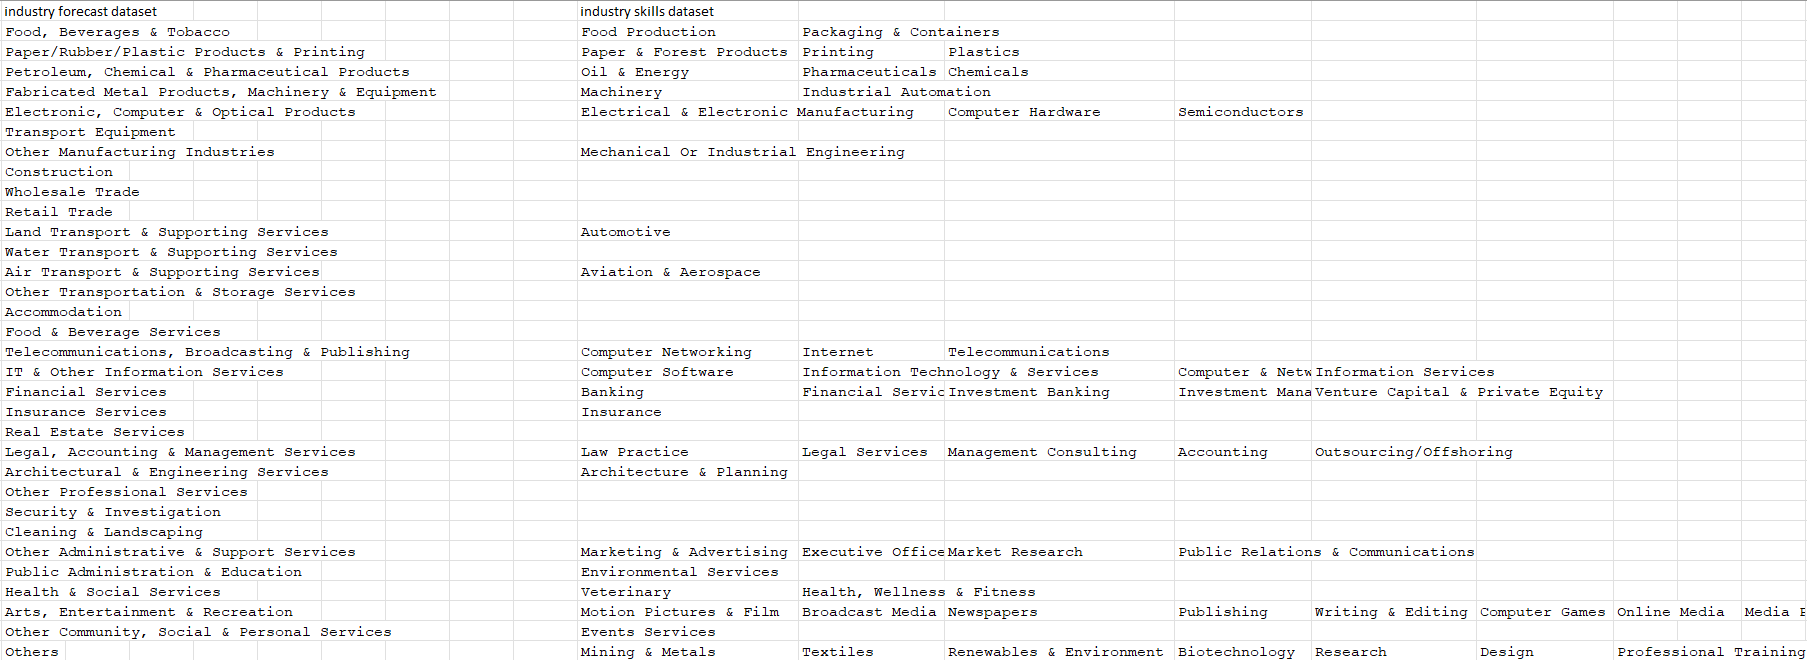

## Reducing it further to 20
Since some industries in our industry forecast dataset do not have the appropriate mapping in the industry skills dataset, we will remove those industries from consideration. We also reduce the number of mappings per industry to a maximum of the 3 most appropriate ones. This cuts down the number of industries to 20.


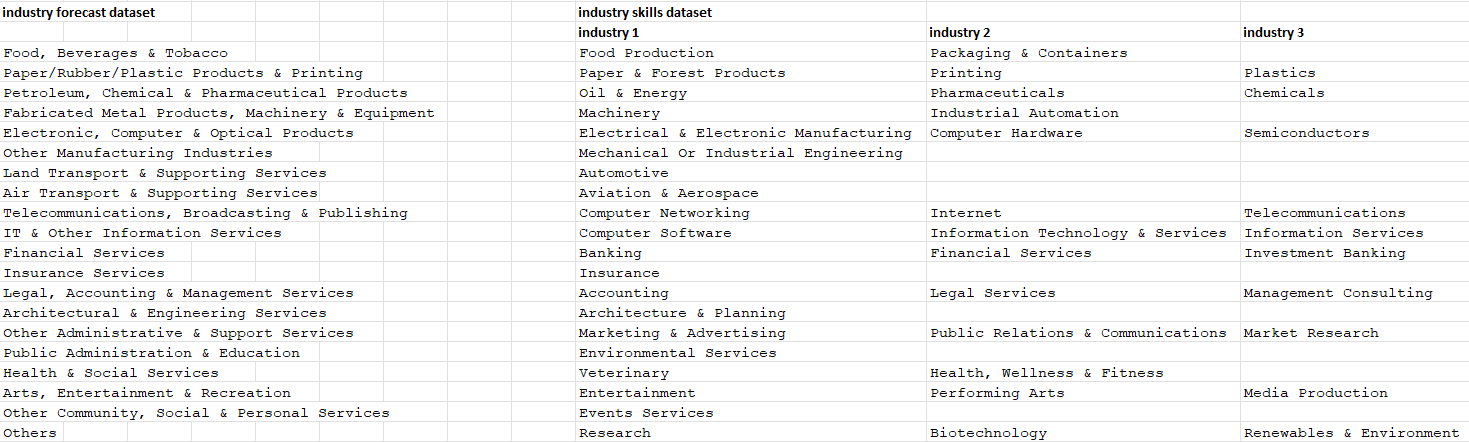

In [206]:
industryMap = {'Food, Beverages & Tobacco': ['Food Production', 'Packaging & Containers'],
              'Paper/Rubber/Plastic Products & Printing': ['Paper & Forest Products', 'Printing', 'Plastics'],
               'Petroleum, Chemical & Pharmaceutical Products': ['Oil & Energy', 'Pharmaceuticals', 'Chemicals'],
               'Fabricated Metal Products, Machinery & Equipment': ['Machinery', 'Industrial Automation'],
               'Electronic, Computer & Optical Products': ['Electrical & Electronic Manufacturing', 'Computer Hardware', 'Semiconductors'],
               'Other Manufacturing Industries': ['Mechanical Or Industrial Engineering'],
               'Land Transport & Supporting Services': ['Automotive'],
               'Air Transport & Supporting Services': ['Aviation & Aerospace'],
               'Telecommunications, Broadcasting & Publishing': ['Computer Networking', 'Internet', 'Telecommunications'],
               'IT & Other Information Services': ['Computer Software', 'Information Technology & Services', 'Information Services'],
               'Financial Services': ['Banking', 'Financial Services', 'Investment Banking'],
               'Insurance Services': ['Insurance'],
               'Legal, Accounting & Management Services': ['Accounting', 'Legal Services', 'Management Consulting'],
               'Architectural & Engineering Services': ['Architecture & Planning'],
               'Other Administrative & Support Services': ['Marketing & Advertising', 'Public Relations & Communications', 'Market Research'],
               'Public Administration & Education': ['Environmental Services'],
               'Health & Social Services': ['Veterinary', 'Health, Wellness & Fitness'],
               'Arts, Entertainment & Recreation': ['Entertainment', 'Performing Arts', 'Media Production'],
               'Other Community, Social & Personal Services': ['Events Services'],
               'Others': ['Research', 'Biotechnology', 'Renewables & Environment']
              }

In [207]:
validIndustries = []

for x,y in industryMap.items():
    for ind in y:
        validIndustries.append(ind)
        
print(validIndustries)
print(len(validIndustries))

['Food Production', 'Packaging & Containers', 'Paper & Forest Products', 'Printing', 'Plastics', 'Oil & Energy', 'Pharmaceuticals', 'Chemicals', 'Machinery', 'Industrial Automation', 'Electrical & Electronic Manufacturing', 'Computer Hardware', 'Semiconductors', 'Mechanical Or Industrial Engineering', 'Automotive', 'Aviation & Aerospace', 'Computer Networking', 'Internet', 'Telecommunications', 'Computer Software', 'Information Technology & Services', 'Information Services', 'Banking', 'Financial Services', 'Investment Banking', 'Insurance', 'Accounting', 'Legal Services', 'Management Consulting', 'Architecture & Planning', 'Marketing & Advertising', 'Public Relations & Communications', 'Market Research', 'Environmental Services', 'Veterinary', 'Health, Wellness & Fitness', 'Entertainment', 'Performing Arts', 'Media Production', 'Events Services', 'Research', 'Biotechnology', 'Renewables & Environment']
43


In [208]:
df = df[np.isin(df['industry_name'], validIndustries)]
df.reset_index(drop=True)
df

,industry_name,skill_group_name,skill_group_rank
10,Oil & Energy,Oil & Gas,1.0
11,Oil & Energy,Drilling Engineering,2.0
12,Oil & Energy,Utilities,3.0
13,Oil & Energy,Negotiation,4.0
14,Oil & Energy,Digital Literacy,5.0
...,...,...,...
685,"Health, Wellness & Fitness",Sports Coaching,6.0
686,"Health, Wellness & Fitness",Digital Literacy,7.0
687,"Health, Wellness & Fitness",Public Health,8.0
688,"Health, Wellness & Fitness",Business Management,9.0


## Unique Skills

In [209]:
print(df['skill_group_name'].unique())
print(len(df['skill_group_name'].unique()))

['Oil & Gas' 'Drilling Engineering' 'Utilities' 'Negotiation'
 'Digital Literacy' 'Project Management' 'Teamwork' 'Leadership'
 'Business Management' 'Instrumentation' 'Pharmaceutics'
 'Pharmaceutical Manufacturing' 'Research' 'Product Testing' 'Oncology'
 'Organic Chemistry' 'Food Manufacturing' 'Food Service Operations'
 'Cooking' 'Manufacturing Operations' 'Aerospace Engineering' 'Air Force'
 'Airlines' 'Aircraft Management' 'Composites' 'Scientific Computing'
 'Machining' 'Automotive' 'Customer Experience' 'Foreign Languages'
 'Maintenance & Repair' 'Chemical Processing' 'Architecture' 'Forestry'
 'Enterprise Software' 'Printing' 'Graphic Design' 'Retail Packaging'
 'Arts & Crafts' 'Product Marketing' 'Electronics' 'Power Systems'
 'Robotics' 'Plastics' 'Product Development' 'Environmental Science'
 'Electronic Control Systems' 'Computer Hardware' 'Technical Support'
 'System Administration' 'Computer Networking' 'Development Tools'
 'Web Development' 'Mobile Application Developmen

In [210]:
invIndustryMap = {}

for x, y in industryMap.items():
    for ind in y:
        invIndustryMap[ind] = x
    
print(invIndustryMap)
print(len(invIndustryMap))

{'Food Production': 'Food, Beverages & Tobacco', 'Packaging & Containers': 'Food, Beverages & Tobacco', 'Paper & Forest Products': 'Paper/Rubber/Plastic Products & Printing', 'Printing': 'Paper/Rubber/Plastic Products & Printing', 'Plastics': 'Paper/Rubber/Plastic Products & Printing', 'Oil & Energy': 'Petroleum, Chemical & Pharmaceutical Products', 'Pharmaceuticals': 'Petroleum, Chemical & Pharmaceutical Products', 'Chemicals': 'Petroleum, Chemical & Pharmaceutical Products', 'Machinery': 'Fabricated Metal Products, Machinery & Equipment', 'Industrial Automation': 'Fabricated Metal Products, Machinery & Equipment', 'Electrical & Electronic Manufacturing': 'Electronic, Computer & Optical Products', 'Computer Hardware': 'Electronic, Computer & Optical Products', 'Semiconductors': 'Electronic, Computer & Optical Products', 'Mechanical Or Industrial Engineering': 'Other Manufacturing Industries', 'Automotive': 'Land Transport & Supporting Services', 'Aviation & Aerospace': 'Air Transport 

## Create Industry to Skill Matrix

In [211]:
df_out = pd.DataFrame(0, index = list(industryMap.keys()), columns = df['skill_group_name'].unique())
df_out

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Paper/Rubber/Plastic Products & Printing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Petroleum, Chemical & Pharmaceutical Products",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Fabricated Metal Products, Machinery & Equipment",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Electronic, Computer & Optical Products",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other Manufacturing Industries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Land Transport & Supporting Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Transport & Supporting Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Telecommunications, Broadcasting & Publishing",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IT & Other Information Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Adding skill ranking per industry (0 = N.A.)

When there is clash in skills, the average is taken

In [212]:
numClash = pd.DataFrame(1, index = list(industryMap.keys()), columns = df['skill_group_name'].unique())
numClash

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Paper/Rubber/Plastic Products & Printing,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Petroleum, Chemical & Pharmaceutical Products",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Fabricated Metal Products, Machinery & Equipment",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Electronic, Computer & Optical Products",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Other Manufacturing Industries,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Land Transport & Supporting Services,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Air Transport & Supporting Services,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Telecommunications, Broadcasting & Publishing",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IT & Other Information Services,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [213]:
for index, row in df.iterrows():
    df_out[row['skill_group_name']][invIndustryMap[row['industry_name']]] += row['skill_group_rank']
    numClash[row['skill_group_name']][invIndustryMap[row['industry_name']]] += 1
    
df_out = df_out.div(numClash)
df_out

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",0.0,0.0,0.0,3.333333,4.000000,0.000000,4.000000,3.333333,4.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paper/Rubber/Plastic Products & Printing,0.0,0.0,0.0,3.500000,3.500000,4.500000,5.000000,6.250000,4.750000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Petroleum, Chemical & Pharmaceutical Products",0.5,1.0,1.5,2.333333,4.250000,5.333333,4.500000,6.000000,6.750000,5.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fabricated Metal Products, Machinery & Equipment",0.0,1.5,2.5,0.500000,4.333333,5.000000,3.500000,2.500000,4.500000,2.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Electronic, Computer & Optical Products",0.0,4.0,5.0,0.000000,2.750000,4.500000,2.000000,4.000000,3.500000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Manufacturing Industries,0.0,2.5,0.0,3.000000,1.500000,4.000000,5.000000,4.500000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Land Transport & Supporting Services,0.0,0.0,0.0,1.000000,2.500000,0.000000,3.000000,1.500000,3.500000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Transport & Supporting Services,0.0,0.0,0.0,0.000000,3.500000,0.000000,4.000000,5.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Telecommunications, Broadcasting & Publishing",0.0,0.0,0.0,0.000000,5.250000,3.500000,2.333333,5.000000,3.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IT & Other Information Services,0.0,0.0,0.0,0.000000,1.000000,6.000000,4.000000,6.250000,1.500000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
df_out = df_out.replace({0:np.nan})
df_out = df_out.rank(axis=1, pct=True)
for index, row in df_out.iterrows():
    row = (row - row.min())/(row.max()-row.min())
    df_out.loc[index, :] = list(row)

In [217]:
df_out

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",NaN,NaN,NaN,0.400000,0.640000,NaN,0.640000,0.400000,0.840000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paper/Rubber/Plastic Products & Printing,NaN,NaN,NaN,0.500000,0.500000,0.736842,0.894737,1.000000,0.789474,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Petroleum, Chemical & Pharmaceutical Products",0.0,0.156250,0.250000,0.437500,0.562500,0.875000,0.718750,0.937500,1.000000,0.812500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Fabricated Metal Products, Machinery & Equipment",NaN,0.161290,0.387097,0.000000,0.806452,1.000000,0.580645,0.387097,0.870968,0.258065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Electronic, Computer & Optical Products",NaN,0.743590,0.923077,NaN,0.358974,0.846154,0.179487,0.743590,0.538462,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Manufacturing Industries,NaN,0.444444,NaN,0.555556,0.222222,0.777778,1.000000,0.888889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Transport & Supporting Services,NaN,NaN,NaN,0.111111,0.444444,NaN,0.555556,0.222222,0.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Transport & Supporting Services,NaN,NaN,NaN,NaN,0.666667,NaN,0.777778,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Telecommunications, Broadcasting & Publishing",NaN,NaN,NaN,NaN,1.000000,0.500000,0.222222,0.888889,0.444444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT & Other Information Services,NaN,NaN,NaN,NaN,0.000000,0.931034,0.689655,1.000000,0.103448,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df_out = df_out.applymap(lambda x: expon.pdf(5*x, scale=1))
df_out = df_out.replace({np.nan: 0})
df_out

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",0.0,0.000000,0.000000,0.135335,0.040762,0.000000,0.040762,0.135335,0.014996,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Paper/Rubber/Plastic Products & Printing,0.0,0.000000,0.000000,0.082085,0.082085,0.025117,0.011405,0.006738,0.019305,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
"Petroleum, Chemical & Pharmaceutical Products",1.0,0.457833,0.286505,0.112197,0.060055,0.012588,0.027495,0.009210,0.006738,0.017206,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
"Fabricated Metal Products, Machinery & Equipment",0.0,0.446439,0.144354,1.000000,0.017734,0.006738,0.054846,0.144354,0.012845,0.275182,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
"Electronic, Computer & Optical Products",0.0,0.024284,0.009898,0.000000,0.166149,0.014541,0.407613,0.024284,0.067724,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Other Manufacturing Industries,0.0,0.108368,0.000000,0.062177,0.329193,0.020468,0.006738,0.011744,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Land Transport & Supporting Services,0.0,0.000000,0.000000,0.573753,0.108368,0.000000,0.062177,0.329193,0.035674,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Air Transport & Supporting Services,0.0,0.000000,0.000000,0.000000,0.035674,0.000000,0.020468,0.006738,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
"Telecommunications, Broadcasting & Publishing",0.0,0.000000,0.000000,0.000000,0.006738,0.082085,0.329193,0.011744,0.108368,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
IT & Other Information Services,0.0,0.000000,0.000000,0.000000,1.000000,0.009512,0.031800,0.006738,0.596163,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [224]:
for index, row in df_out.iterrows():
    row = row/row.sum()
    df_out.loc[index, :] = list(row)
    
df_out

,Oil & Gas,Drilling Engineering,Utilities,Negotiation,Digital Literacy,Project Management,Teamwork,Leadership,Business Management,Instrumentation,...,Event Planning,Time Management,Theatre,Music,Dance,Wellness,Physical Medicine and Rehabilitation,Personal Coaching,Sports Coaching,Public Health
"Food, Beverages & Tobacco",0.000000,0.000000,0.000000,0.037295,0.011233,0.000000,0.011233,0.037295,0.004132,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Paper/Rubber/Plastic Products & Printing,0.000000,0.000000,0.000000,0.014947,0.014947,0.004574,0.002077,0.001227,0.003515,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Petroleum, Chemical & Pharmaceutical Products",0.201445,0.092228,0.057715,0.022601,0.012098,0.002536,0.005539,0.001855,0.001357,0.003466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Fabricated Metal Products, Machinery & Equipment",0.000000,0.106156,0.034325,0.237785,0.004217,0.001602,0.013042,0.034325,0.003054,0.065434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Electronic, Computer & Optical Products",0.000000,0.004905,0.001999,0.000000,0.033561,0.002937,0.082335,0.004905,0.013680,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Other Manufacturing Industries,0.000000,0.046371,0.000000,0.026605,0.140862,0.008758,0.002883,0.005025,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Land Transport & Supporting Services,0.000000,0.000000,0.000000,0.245510,0.046371,0.000000,0.026605,0.140862,0.015265,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Air Transport & Supporting Services,0.000000,0.000000,0.000000,0.000000,0.015265,0.000000,0.008758,0.002883,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Telecommunications, Broadcasting & Publishing",0.000000,0.000000,0.000000,0.000000,0.001262,0.015379,0.061677,0.002200,0.020304,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IT & Other Information Services,0.000000,0.000000,0.000000,0.000000,0.249373,0.002372,0.007930,0.001680,0.148667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [225]:
df_out.to_csv('Forecast/Industry to Skill Matrix.csv')